# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

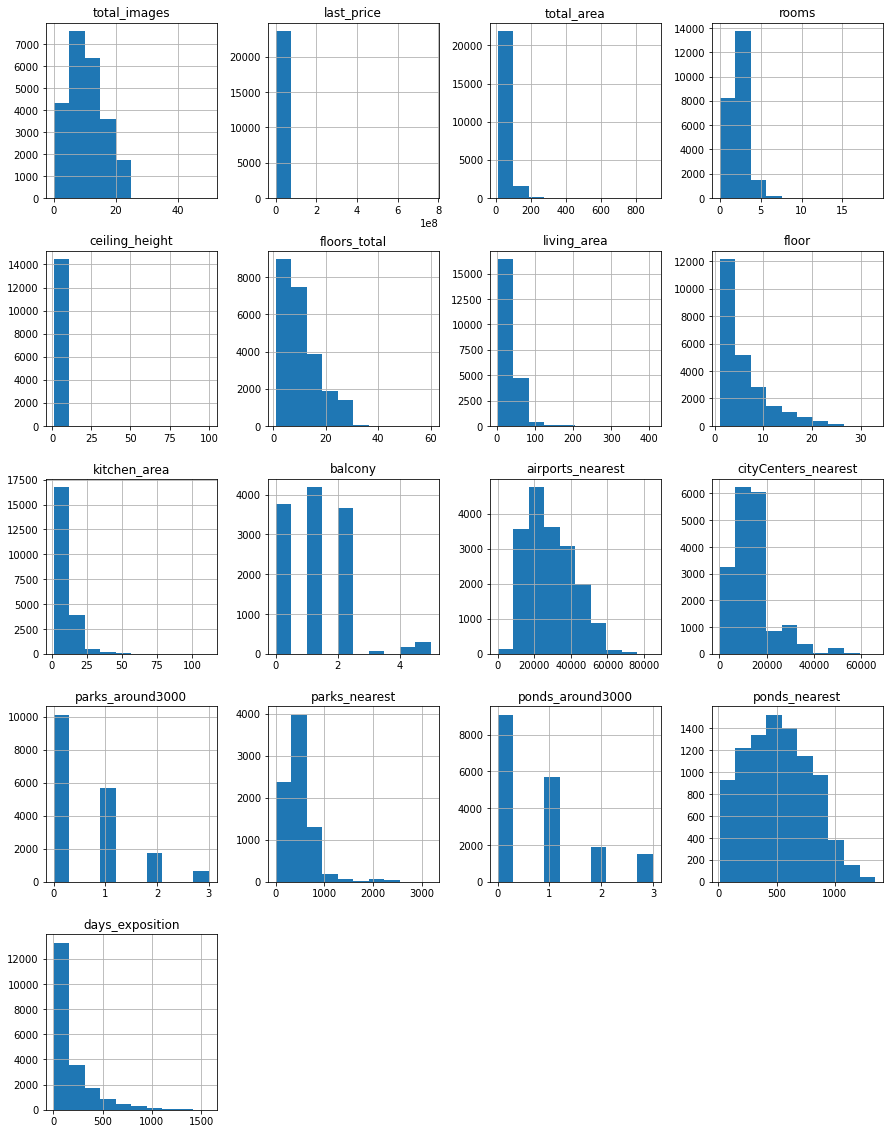

In [4]:
data.hist(figsize = (15,20));


Для большинства параметров существует понятное распределение значений, к примеру количество картинок, ближайшие аэропорты или парки и другие, но у некоторых показателей существуют очень большие выбросы к примеру высота потолков(ошибка данных), разброс цены, общая площадь или количество комнат, имеют один пик в узком диапазоне значений и малое количество объявлений с очень сильно отличаются значения от самых часто встречающихся

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [7]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
def fill_floor(current_floor):
    floors_median = data['floors_total'].median()
    if current_floor>floors_median:
        return current_floor
    else:
        return floors_median

In [9]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace = True)
#Медианное значение высоты потолков - подходящее значение для заполнения пропусков (если в целом надо чем-то заполнять - то лучше медианой)
data['floors_total'] = data['floors_total'].fillna(data['floor'].apply(fill_floor))
# то же справедливо и для высоты зданий так или иначе ы целом высота строящихся зданий примерно одинаковая
#data['living_area'].fillna(data['living_area'].median(), inplace = True)
# у жилой площади тоже виден явный пик и не очень большой разброс, думаю, можно заполнить 
#data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace = True)
data['balcony'].fillna(0, inplace = True)


In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')


In [11]:
data['locality_name'] = data['locality_name']\
.str.replace('поселок городского типа','поселок')\
.replace(['поселок городского типа', 'городской поселок','коттеджный поселок'], 'поселок', regex=True)


In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Дату лучше держать в формате даты а не объекта, для дальнейших манипуляций

In [14]:
data['floor'] = data['floor'].astype(int)
data['balcony'] = data['balcony'].astype(int)

In [15]:
data.duplicated().any()

False

In [16]:
#цена одного квадратного метра
data['price_m2'] = data['last_price']/data['total_area']
#день недели публикации
data['day_of_week'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
#тип этажа квартиры (значения — «‎первый», «последний», «другой»)
data['floor_cat'] = \
['первый' if x['floor'] == 1 else 'последний' if x['floor'] == x['floors_total'] else 'другой' for i, x in data.iterrows()]
#расстояние до центра города в километрах 
data['dist_in_km'] = round(data['cityCenters_nearest']/1000, 0)


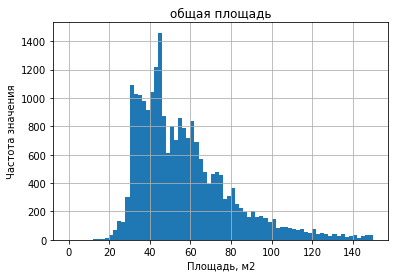

In [17]:
data.query('total_area<300')['total_area']\
.plot(kind = 'hist', bins = 75,title = 'общая площадь',range = (0,150), grid = True)
plt.ylabel('Частота значения')
plt.xlabel('Площадь, м2')
plt.show()


общая площадь - наиболее часто встречающиеся значения около 30 метров, существуют квартиры более 300 метров, но таких строк очень мало и в общей картине они незначительны


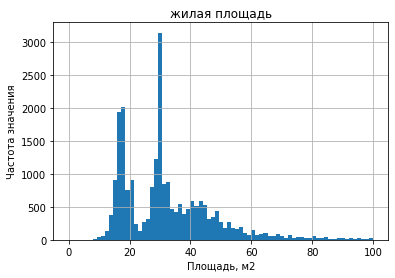

In [18]:
data.query('living_area<200')['living_area']\
.plot(kind = 'hist', bins = 75,range = (0,100),title = 'жилая площадь', grid = True)
plt.ylabel('Частота значения')
plt.xlabel('Площадь, м2')
plt.show()

жилая площадь - аналогично общей площади, однако тут будто имеется 2 пика видимо из-за большого количества 1 комнатных квартир


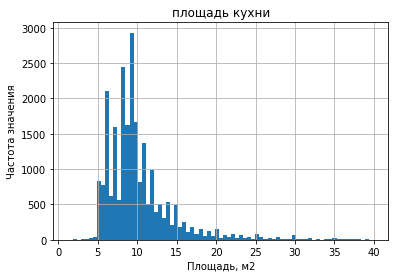

In [19]:
data[data['kitchen_area']<40]['kitchen_area']\
.plot(kind = 'hist', bins = 75,title = 'площадь кухни', grid = True);
plt.ylabel('Частота значения')
plt.xlabel('Площадь, м2')
plt.show()

площадь кухни - распределение вроде бы нормальное, но присутствуют "зубцы" природа которых неясна


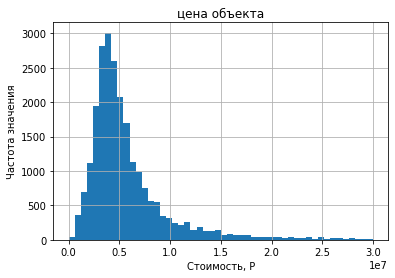

In [20]:
data.query('last_price<30000000')['last_price']\
.plot(kind = 'hist',title = 'цена объекта',bins = 50, grid = True)
plt.ylabel('Частота значения')
plt.xlabel('Стоимость, Р')
plt.show()

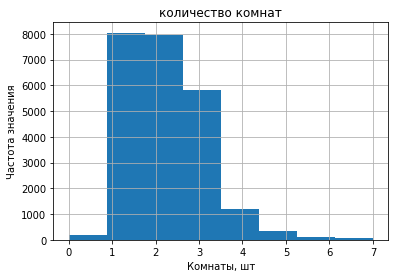

In [21]:
data.query('rooms<8')['rooms'].plot(kind = 'hist',bins = 8,title = 'количество комнат', grid = True)
plt.ylabel('Частота значения')
plt.xlabel('Комнаты, шт')
plt.show()


количество комнат - самые частые значения от 1 до 3 комнат, существует какое-то количество квартир с количеством комнат равным 0, вероятно это ошибка, но может быть это какие-то технические помещения


In [22]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10

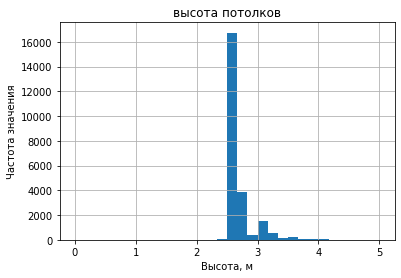

In [23]:
data['ceiling_height'].plot(kind = 'hist',title = 'высота потолков',range = (0,5), grid = True, bins =30)
plt.ylabel('Частота значения')
plt.xlabel('Высота, м')
plt.show()

высота потолков - большинство значений около 2.5 метров;


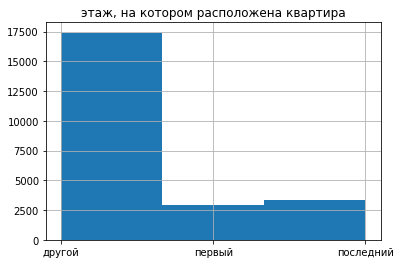

In [24]:
data['floor_cat'].hist(bins = 3)
plt.title('этаж, на котором расположена квартира')
plt.show()


тип этажа квартиры («первый», «последний», «другой») - логично что чаще встречаются значения другой что-то кроме первого и последнего


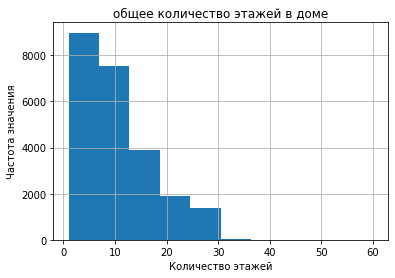

In [25]:

data['floors_total'].plot(kind = 'hist',title = 'общее количество этажей в доме', grid = True)
plt.ylabel('Частота значения')
plt.xlabel('Количество этажей')
plt.show()

общее количество этажей в доме - тут вроде все обычно, довольно большое количество низкоэтажной застройки, большинство квартир меньше 10 этажей


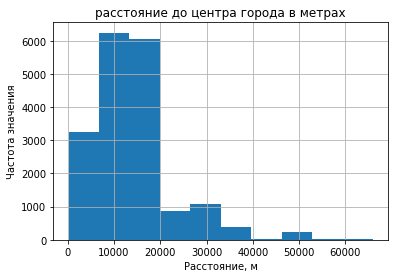

In [26]:
data['cityCenters_nearest'].plot(kind = 'hist',title = 'расстояние до центра города в метрах', grid = True);
plt.ylabel('Частота значения')
plt.xlabel('Расстояние, м')
plt.show()

расстояние до центра города в метрах - существует некоторое количество квартир очень сильно удаленных от центра, было предположение что это частные дома однако 10 самых удаленных от центра построек часто имеют больше 1 этажа


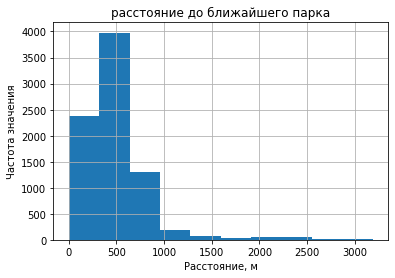

In [27]:
data['parks_nearest'].plot(kind = 'hist',title = 'расстояние до ближайшего парка', grid = True);
plt.ylabel('Частота значения')
plt.xlabel('Расстояние, м')
plt.show()

расстояние до ближайшего парка - у большинства построек парк расположен в радиусе 500 метров

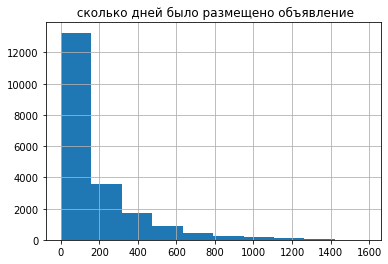

In [28]:
data['days_exposition'].hist()
plt.title(' сколько дней было размещено объявление')
plt.show()

<AxesSubplot:>

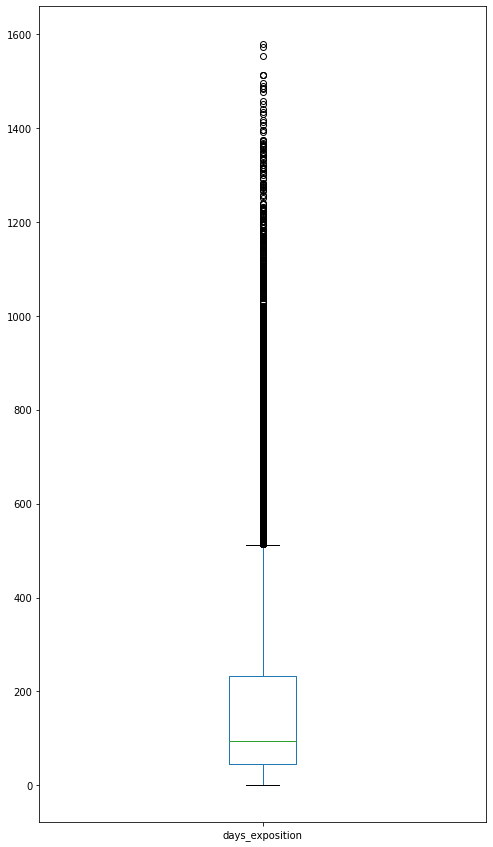

In [29]:
data['days_exposition'].plot(kind = 'box', figsize = (8,15))

In [30]:
data['days_exposition'].mean(),data['days_exposition'].median()

(180.88863436982163, 95.0)

In [31]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартира продавалась в течение полугода, однако медианное значение - 3 месяца, продажи менее 3 месяцев можно считать быстрыми а более полугода - долгими 

Если использовать боксплот или описание то видно что 50 процентиль это 95 дней, если принять что от 25 до 75 процентиля это нормальные значения сроков продажи, то все что меньше 45 дней - это быстро, а все что больше 232 дней это долго. Сам по себе разброс значений здесь очень большой - есть выбросы и значения в 1500 дней, что тоже можно описать как необычно долгие.

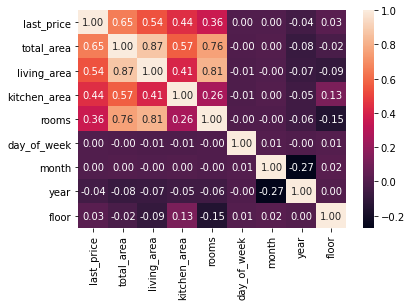

In [32]:
corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area',
             'rooms', 'day_of_week', 'month', 'year','floor_cat','floor']].corr()

sns.heatmap(corr, annot=True, fmt=".2f");

Самая большая зависимость стоимости от общей площади жилья. 

In [33]:
(data[data['floor_cat']=='первый']['last_price'].median(),
data[data['floor_cat']=='последний']['last_price'].median(),
data[data['floor_cat']=='другой']['last_price'].median())

(3900000.0, 4337500.0, 4850000.0)

Если сравнивать медианные значения, то видна разница в ценах однако поэтажной зависимости нет, исходя из медианных значений - самые дорогие квартиры находятся на последних этажах.

In [34]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area',
             'rooms', 'day_of_week', 'month', 'year','floor_cat','floor']]

,last_price,total_area,living_area,kitchen_area,rooms,day_of_week,month,year,floor_cat,floor
0,13000000.0,108.00,51.0,25.00,3,3,3,2019,другой,8
1,3350000.0,40.40,18.6,11.00,1,1,12,2018,первый,1
2,5196000.0,56.00,34.3,8.30,2,3,8,2015,другой,4
3,64900000.0,159.00,30.0,9.10,3,4,7,2015,другой,9
4,10000000.0,100.00,32.0,41.00,2,1,6,2018,другой,13
...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,73.3,13.83,3,1,3,2017,другой,3
23695,3100000.0,59.00,38.0,8.50,3,0,1,2018,другой,4
23696,2500000.0,56.70,29.7,9.10,2,6,2,2018,первый,1
23697,11475000.0,76.75,30.0,23.30,2,1,3,2017,другой,12


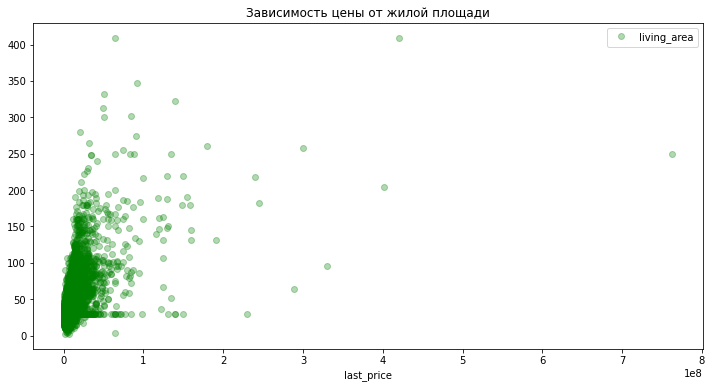

In [35]:
data[['last_price', 'living_area']].plot(x = 'last_price',
                                        y = 'living_area',
                                        style = 'o',
                                        alpha = 0.3,
                                        color = 'green',
                                       title = 'Зависимость цены от жилой площади',
                                       figsize = (12,6));

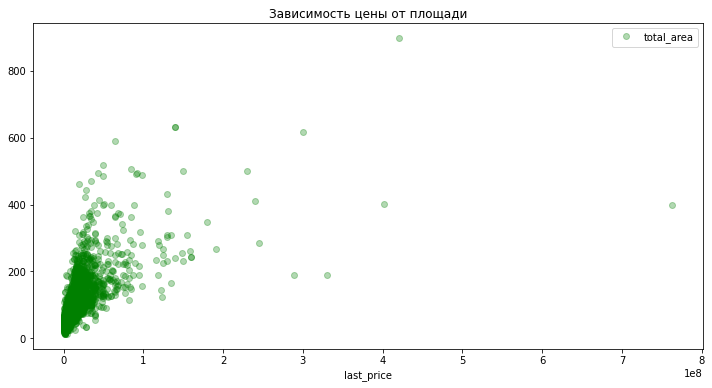

In [36]:
data[['last_price', 'total_area']].plot(x = 'last_price',
                                        y = 'total_area',
                                        style = 'o',
                                        alpha = 0.3,
                                        color = 'green',
                                       title = 'Зависимость цены от площади',
                                       figsize = (12,6));

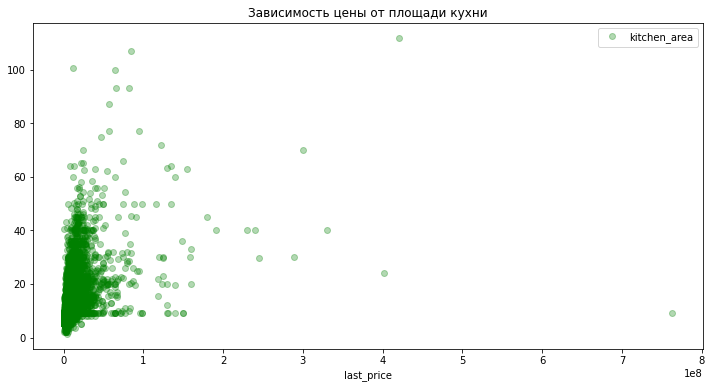

In [37]:
data[['last_price', 'kitchen_area']].plot(x = 'last_price',
                                        y = 'kitchen_area',
                                        style = 'o',
                                        alpha = 0.3,
                                        color = 'green',
                                       title = 'Зависимость цены от площади кухни',
                                       figsize = (12,6));

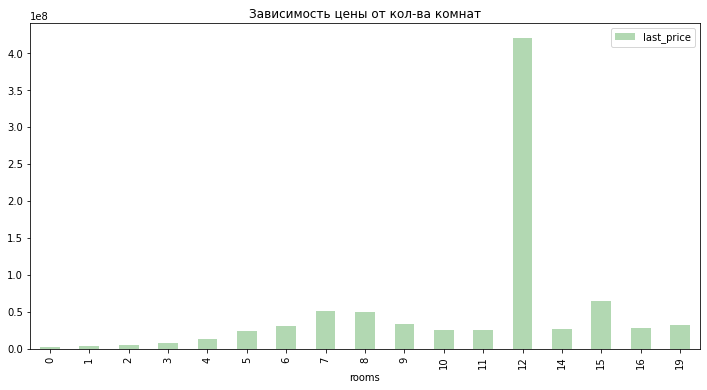

In [38]:
grouped_rooms_price = data[['last_price', 'rooms']].groupby('rooms',as_index = False).mean()
grouped_rooms_price['last_price'] =round(grouped_rooms_price['last_price'],2)
grouped_rooms_price.plot(x = 'rooms', 
                         y = 'last_price',
                        kind = 'bar',
                        alpha = 0.3,
                        color = 'green',
                       title = 'Зависимость цены от кол-ва комнат',
                       figsize = (12,6));


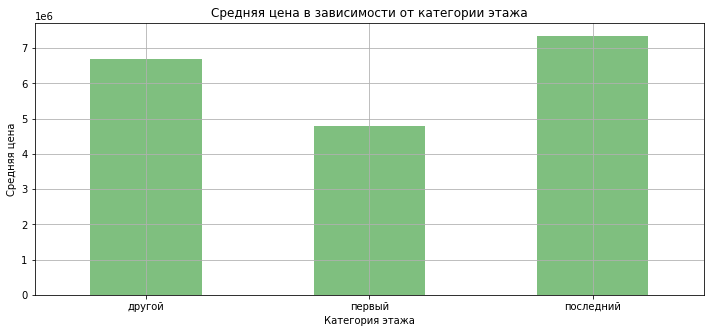

In [39]:
mean_prices = data.groupby('floor_cat')['last_price'].mean()
mean_prices.plot(kind='bar', alpha=0.5, color='green', figsize=(12, 5))
plt.title('Средняя цена в зависимости от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Средняя цена')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

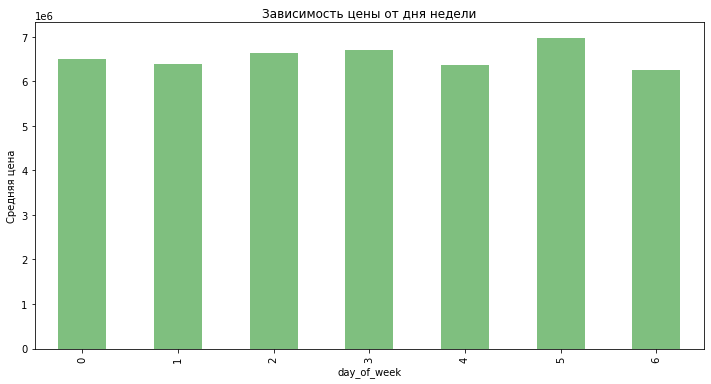

In [40]:
day_data = data.groupby('day_of_week')['last_price'].mean()
day_data.plot(x = 'last_price',
                                        y = 'day_of_week',
                                        kind = 'bar',
                                        alpha = 0.5,
                                        color = 'green',
                                       title = 'Зависимость цены от дня недели',
                                       figsize = (12,6))
plt.ylabel('Средняя цена');

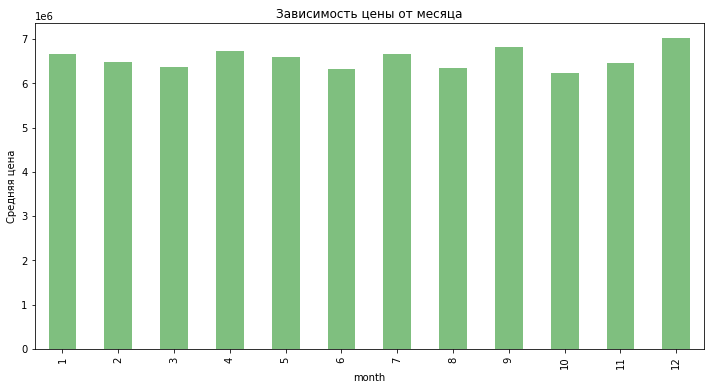

In [41]:
day_data = data.groupby('month')['last_price'].mean()
day_data.plot(x = 'last_price',
                                        y = 'month',
                                        kind = 'bar',
                                        alpha = 0.5,
                                        color = 'green',
                                       title = 'Зависимость цены от месяца',
                                       figsize = (12,6))
plt.ylabel('Средняя цена');

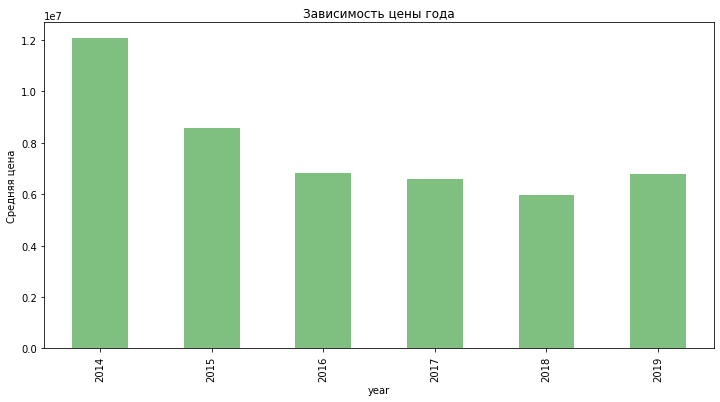

In [42]:
day_data = data.groupby('year')['last_price'].mean()
day_data.plot(x = 'last_price',
                                        y = 'year',
                                        kind = 'bar',
                                        alpha = 0.5,
                                        color = 'green',
                                       title = 'Зависимость цены года',
                                       figsize = (12,6))
plt.ylabel('Средняя цена');

In [43]:
agg_table = data.pivot_table(index = 'locality_name',values = ['last_price','total_area'],aggfunc = ['count','sum'])
agg_table.columns = ['count','count_total_area','sum_last_price','sum_total_area']
agg_table = agg_table[['count','sum_last_price','sum_total_area']].sort_values(by = 'count',ascending = False).head(10)
agg_table['price_m2'] = round(agg_table['sum_last_price']/agg_table['sum_total_area'],2)
agg_table.sort_values(by = 'price_m2')



,count,sum_last_price,sum_total_area,price_m2
locality_name,,,,
Выборг,237,7.704830e+08,13307.56,57898.14
Всеволожск,398,1.508049e+09,22296.83,67635.13
Гатчина,307,1.070919e+09,15639.48,68475.38
Колпино,338,1.339839e+09,17992.24,74467.62
поселок Шушары,440,1.807556e+09,23681.36,76328.22
поселок Мурино,556,2.030713e+09,24442.54,83081.09
поселок Парголово,327,1.467600e+09,16847.50,87110.87
деревня Кудрово,299,1.266013e+09,13924.95,90916.90
Пушкин,369,2.387074e+09,22712.98,105097.36


In [44]:
agg_table = data.pivot_table(index='locality_name', values=['last_price', 'total_area'], aggfunc=['count', 'sum', 'median'])
agg_table.columns = ['count', 'count_total_area', 'sum_last_price', 'sum_total_area', 'median_last_price', 'median_total_area']

agg_table.sort_values(by ='count',ascending = False)
agg_table['price_m2'] = round(agg_table['sum_last_price']/agg_table['sum_total_area'],2)
agg_table['price_m2_median'] = round(agg_table['median_last_price']/agg_table['median_total_area'],2)
agg_table.sort_values(by = 'count',ascending = False).head(10)



,count,count_total_area,sum_last_price,sum_total_area,median_last_price,median_total_area,price_m2,price_m2_median
locality_name,,,,,,,,
Санкт-Петербург,15721,15721,1.267507e+11,1017958.15,5500000.0,55.00,124514.62,100000.00
поселок Мурино,556,556,2.030713e+09,24442.54,3400000.0,37.40,83081.09,90909.09
поселок Шушары,440,440,1.807556e+09,23681.36,3950000.0,50.10,76328.22,78842.32
Всеволожск,398,398,1.508049e+09,22296.83,3450000.0,53.55,67635.13,64425.77
Пушкин,369,369,2.387074e+09,22712.98,5180000.0,53.20,105097.36,97368.42
Колпино,338,338,1.339839e+09,17992.24,3600000.0,50.00,74467.62,72000.00
поселок Парголово,327,327,1.467600e+09,16847.50,4100000.0,43.00,87110.87,95348.84
Гатчина,307,307,1.070919e+09,15639.48,3100000.0,45.00,68475.38,68888.89
деревня Кудрово,299,299,1.266013e+09,13924.95,3790000.0,39.90,90916.90,94987.47


Населённый пункт с самой высокой стоимостью квадратного метра:
- *Санкт-Петербург* 

С самой низкой стоимостью квадратного метра :
- *Выборг*.

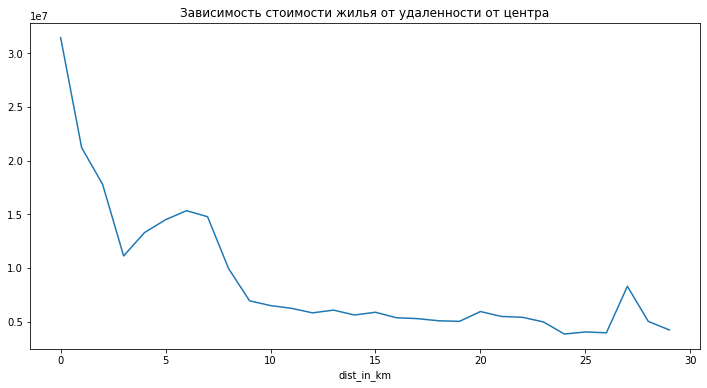

In [45]:
data[data['locality_name'] == 'Санкт-Петербург'].\
groupby('dist_in_km')['last_price'].mean().plot(figsize = (12,6),title ='Зависимость стоимости жилья от удаленности от центра' );


Тренд на снижение стоимости при удалении от центра очень четкий, при этом видны 2 пика в районе 5 км от центра и после ~27 км (Пушкин?) 

### Напишите общий вывод

 - Значение высоты потолков,высоты зданий, жилой площади заполнены медианными значниями 
пропуски балконов заполнены 0 (предполагается, что там где пропуски - балконов просто нет )
 - Удалены явные и неявные дубликаты 
 - Колонка времени приведена к формату времени заменены форматы данных float на int там где это возможно.
 - Добавлены новые колонки:
     - цена одного квадратного метра
     - день недели публикации
     - месяц публикации объявления
     - год публикации объявления
     - тип этажа квартиры (значения — «‎первый», «последний», «другой»)
     - расстояние до центра города в километрах 
 - Построены графики распределения 
    - общая площадь - наиболее часто встречающиеся значения около 30 метров, существуют квартиры более 300 метров, но таких строк очень мало и в общей картине они незначительны
    - жилая площадь - аналогично общей площади, однако тут будто имеется 2 пика видимо из-за большого количества 1 комнатных квартир
    - площадь кухни - распределение вроде бы нормальное, но присутствуют "зубцы" природа которых неясна
    - цена объекта - подавляющее количество событий существует в пределе 15 млн рублей за квартиру однако существуют и выбросы - значения с очень высокой стоимостью
    - количество комнат - самые частые значения от 1 до 3 комнат, существует какое-то количество квартир с количеством комнат равным 0, вероятно это ошибка, но может быть это какие-то технические помещения
    - высота потолков - большинство значений около 2.5 метров;
    - тип этажа квартиры («первый», «последний», «другой») - логично что чаще встречаются значения другой что-то кроме первого и последнего
    - общее количество этажей в доме - тут вроде все обычно, довольно большое количество низкоэтажной застройки, большинство квартир меньше 10 этажей
    - расстояние до центра города в метрах - существует некоторое количество квартир очень сильно удаленных от центра, было предположение что это частные дома однако 10 самых удаленных от центра построек часто имеют больше 1 этажа
    - расстояние до ближайшего парка - у большинства построек парк расположен в радиусе 500 метров
    
В среднем квартира продавалась в течение полугода, однако медианное значение - 3 месяца, продажи менее 3 месяцев можно считать быстрыми а более полугода - долгими.
**Самая большая зависимость стоимости от общей площади жилья.**